> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

Introduction 
The following, analyses the tmdb-movies.csv dataset which consists of movies and the attributes assocated with 
it such as:
  1)The director 
  2)The genre
  3)The budget and revenue
  4)The popularity
     Among others
        
In this report i will be exploring the following questions
 a)Which director has the highest Grossing movies and generates big revenue
 b)Which year had the most released movies and statistic involved

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#import dataset
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv
movies= pd.read_csv('tmdb-movies.csv')


--2022-06-11 18:24:39--  https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 13.225.141.22, 13.225.141.32, 13.225.141.122, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|13.225.141.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6883750 (6.6M) [text/csv]
Saving to: ‘tmdb-movies.csv.3’

tmdb-movies.csv.3   100%[===================>]   6.56M  --.-KB/s    in 0.1s    

2022-06-11 18:24:39 (44.8 MB/s) - ‘tmdb-movies.csv.3’ saved [6883750/6883750]



In [5]:
#listing the first 5 rows and their content
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#defining the number of columns and rows of the dataset
movies.shape


(10866, 21)

The dataset has 10866 rows and 21 columns

In [7]:
#Defining the column names of the dataset
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

The dataset columns are; id, imdb_id, popularity, budget, revenue, original_title,cast, homepage, director,
                         tagline, keywords, overview,runtime, genres, production_companies, release_date, 
                         vote_count, vote_average, release_year, budget_adj, revenue_adj
      
      

In [8]:
#Definign the dataset column datatypes
movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

There are 11 columns with object data type that is;(original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date and imdb_id)
there are 6 columns with int64 data type that is ;(id,budget,revenue,runtime,vote_count,release_year)
and there are 4 columns with data type float64 that is;(Popularity,vote_average,budget_adj and revenue_adj)
                                                                            

In [8]:
#!pip install numpy==1.16.5

In [9]:
#pip install --upgrade numpy==1.18.1

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

With a total of 10866 entries,the following columns contain missing values;
imdb_id,cast ,homepage,director,tagline,keywords,
overview,genres and production_companies 

this is a total of 9 columns with missing vlues,              
                

In [11]:
#Defining the statistcis of the daataset,that is the min and max value for each column,their respective mean and quantiles
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
#checking the number of duplicated values un the dataset
movies.duplicated().sum()

1

There is 1 duplicated row in the dataset

In [13]:
# Checking  for unique values in each column of the dataset
movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [14]:
#checking for null values count per column
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There seems to be a very hugh number of nulls in the columns homepage(7930),tagline(2824),
keywords(1493),production_companies(1030)among the 9 columns with missing data.
The columns could be insignificant or not.

To know the significant columns we will do a correlation heatmap which showcases the 
relevance of the columns in the dataset

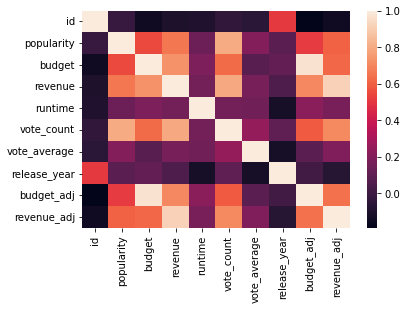

In [15]:
#creatig a hatmap using seaborn to determine correltaion of the columns in the dataset
import seaborn as sns
sns.heatmap(movies.corr());

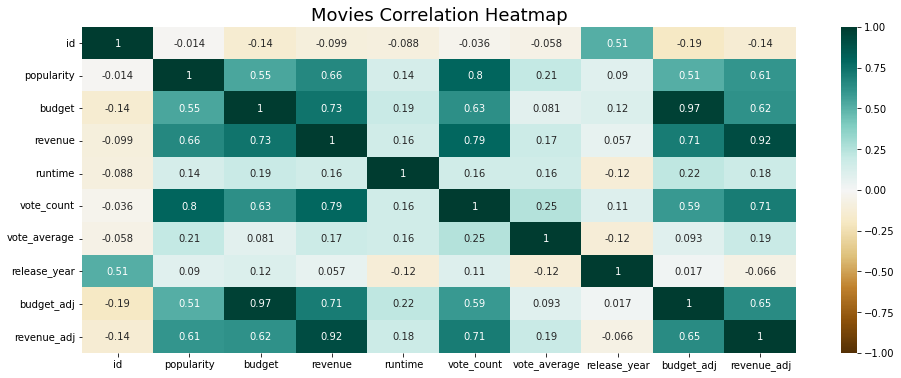

In [16]:
#Creating an annotated heatmap showcasing the correlation between the columns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(movies.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Movies Correlation Heatmap', fontdict={'fontsize':18});


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:3

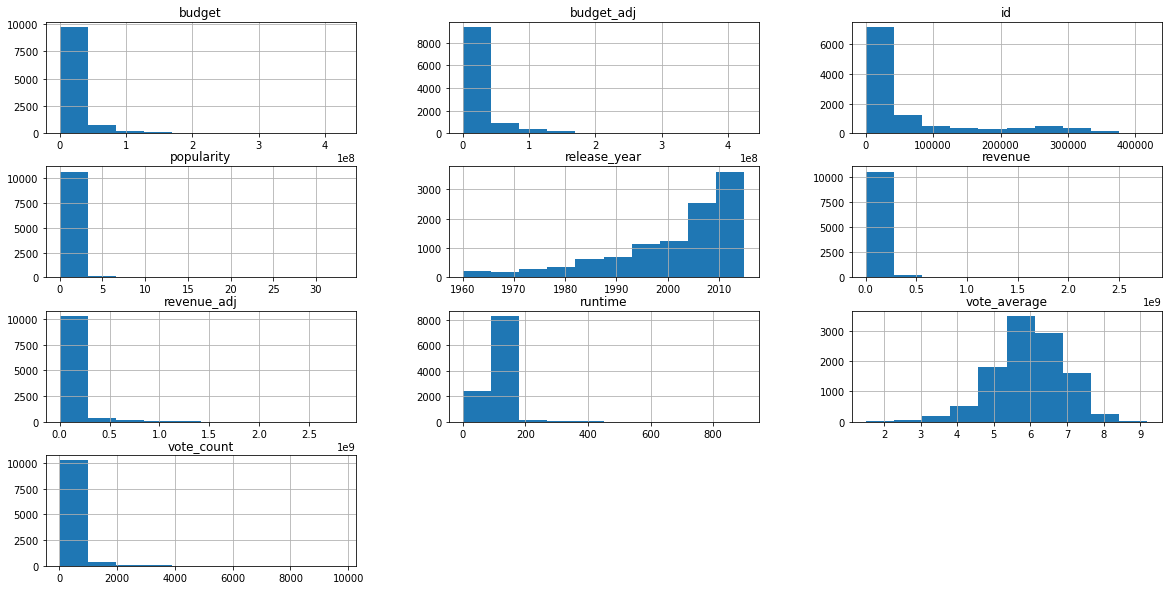

In [17]:
movies.hist(figsize = (20, 10));

From above.we can tell that
Vote average is normally distributed
Most movies lie in a budget of1 to 1.5
Most revenue lies between 0.0 and 0.5

In [18]:
#Defining the categorical variables in the dataset before plotting the correlations
movies_cat=movies.select_dtypes(include=['object']).columns.tolist()
movies_cat

['imdb_id',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies',
 'release_date']

there are 10 columns with categorical variables which include;(imdb_id, original_title,cast,homepage,
director,tagline,keywords,overview, genres, production_companies)


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

Some of the issues to resolve include
1.drop missing values where need be or replace them 
2.remove the duplicated row
3.change the release data type from object to datetime
4.Drop any columns that may not be relevant 

In [19]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#remove the duplicated row and confirming its removed
movies.drop_duplicates(inplace=True)
movies.duplicated().sum()

0

In [20]:
#Converting  the release date data type from object to date time
movies.loc[:,'release_date'] = pd.to_datetime(movies.release_date)
movies.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [21]:
# Finding the column-wise null percentages before dropping any columns
print(round(100*(movies.isnull().sum()/len(movies.index)),2))

id                       0.00
imdb_id                  0.09
popularity               0.00
budget                   0.00
revenue                  0.00
original_title           0.00
cast                     0.70
homepage                72.98
director                 0.40
tagline                 25.99
keywords                13.74
overview                 0.04
runtime                  0.00
genres                   0.21
production_companies     9.48
release_date             0.00
vote_count               0.00
vote_average             0.00
release_year             0.00
budget_adj               0.00
revenue_adj              0.00
dtype: float64


In [22]:
# Drop the irrelevant columns
movies_dropped = ['id', 'imdb_id', 'cast', 'homepage',
             'tagline', 'keywords', 'overview', 'production_companies']
movies.drop(movies_dropped, axis=1, inplace=True)
movies.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [23]:
movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
movies.shape

WE have dropped 10 columns and are left with 13 columns


In [24]:
# dropping duplicate values 
movies = movies.drop_duplicates()

In [25]:
movies = movies.dropna()

In [26]:
movies.shape

(10800, 13)

Having dropped some columns and rows with null values,
our new dataset has 10800 rows and 13 columns from 10866 rows and 21 columns

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which director have populra ratings and the statistics involved
)


In [27]:
#Grouping the dataframe using the director column.
#Find out the top 10 directors for whom the mean of popularity is the highest in a new dataframe top_sdirector
director = movies.groupby('director')
top_directors = director['popularity'].mean().sort_values(ascending=False).head(10)
top_directors

director
Colin Trevorrow                16.696886
Joe Russo|Anthony Russo        12.971027
Chad Stahelski|David Leitch    11.422751
Don Hall|Chris Williams         8.691294
Juno John Lee                   8.411577
Kyle Balda|Pierre Coffin        7.404165
Alan Taylor                     6.883129
Peter Richardson                6.668990
Pete Docter                     6.326804
Christopher Nolan               6.195521
Name: popularity, dtype: float64

WE find the list of the top directors based on the popularity ofv the movies directed
with Colin Trevorrow  coming in first

In [28]:
# Include all movies in which Colin Trevorrow is the director

Colin_Trevorrow = movies.loc[movies['director'].str.contains('Colin Trevorro',na=False)]
Colin_Trevorrow

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4604,0.408010,750000,4007792,Safety Not Guaranteed,Colin Trevorrow,85,Comedy|Romance|Science Fiction|Drama,2012-06-08,341,6.7,2012,7.123082e+05,3.806378e+06


With Colin_Trevorrow having the most popular movie Jurassic World) He also directed Safety Not Guaranteed released back in 2012 
but has a very small score of 0.408010 compared to that of Jurassic World

In [29]:
Colin_Trevorrow_gen = Colin_Trevorrow[['release_year', 'original_title','genres', 'popularity']]
Colin_Trevorrow_gen.head()

,release_year,original_title,genres,popularity
0,2015,Jurassic World,Action|Adventure|Science Fiction|Thriller,32.985763
4604,2012,Safety Not Guaranteed,Comedy|Romance|Science Fiction|Drama,0.408010


In [30]:
# Include all movies in which Juno John Lee is the director

Juno_John_Lee  = movies.loc[movies['director'].str.contains('Juno John Lee',na=False)]
Juno_John_Lee 

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3371,8.411577,0,0,Underworld: Endless War,Juno John Lee,18,Action|Animation|Horror,2011-10-19,21,5.9,2011,0.0,0.0


In [31]:
# Include all movies in which Lilly Wachowski|Lana Wachowski is the director

Wachowski_Sisters  = movies.loc[movies['director'].str.contains('Lilly Wachowski|Lana Wachowski',na=False)]
Wachowski_Sisters  


,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
11,6.189369,176000003,183987723,Jupiter Ascending,Lana Wachowski|Lilly Wachowski,124,Science Fiction|Fantasy|Action|Adventure,2015-02-04,1937,5.2,2015,1.619199e+08,1.692686e+08
2410,7.753899,63000000,463517383,The Matrix,Lilly Wachowski|Lana Wachowski,136,Action|Science Fiction,1999-03-30,6351,7.8,1999,8.247033e+07,6.067687e+08
2963,0.879116,120000000,93945766,Speed Racer,Lana Wachowski|Lilly Wachowski,135,Family|Action|Science Fiction,2008-05-09,194,5.6,2008,1.215344e+08,9.514702e+07
4384,2.478372,102000000,130482868,Cloud Atlas,Lilly Wachowski|Lana Wachowski|Tom Tykwer,172,Drama|Science Fiction,2012-10-26,2162,6.5,2012,9.687392e+07,1.239254e+08
4953,4.212650,150000000,424988211,The Matrix Revolutions,Lilly Wachowski|Lana Wachowski,129,Adventure|Action|Thriller|Science Fiction,2003-11-05,2138,6.4,2003,1.778029e+08,5.037609e+08
4954,4.029240,150000000,738599701,The Matrix Reloaded,Lilly Wachowski|Lana Wachowski,138,Adventure|Action|Thriller|Science Fiction,2003-05-15,2376,6.6,2003,1.778029e+08,8.755011e+08
8497,0.833267,4500000,7011317,Bound,Lana Wachowski|Lilly Wachowski,108,Romance|Drama|Thriller|Crime,1996-09-13,100,6.5,1996,6.255975e+06,9.747250e+06


In [44]:
Wachowski_Sisters_gen = Wachowski_Sisters[['genres', 'popularity']]
Wachowski_Sisters_gen.head()

,genres,popularity
11,Science Fiction|Fantasy|Action|Adventure,6.189369
2410,Action|Science Fiction,7.753899
2963,Family|Action|Science Fiction,0.879116
4384,Drama|Science Fiction,2.478372
4953,Adventure|Action|Thriller|Science Fiction,4.212650


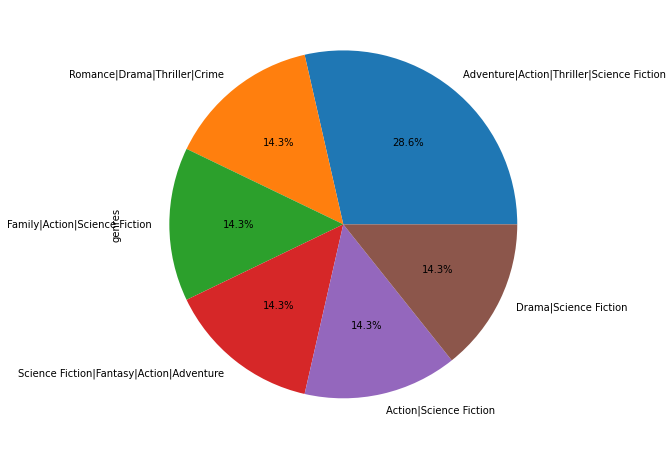

In [60]:
#plot of the Wachowski aiaters and theor percentage distribution
Wachowski_Sisters_gen['genres'].value_counts().plot(kind='pie',figsize = (8,8) , autopct='%1.1f%%',)

,genres,Nbr
0,Animation|Comedy|Family,4
1,Family|Animation|Adventure|Comedy,1
2,Animation|Family,1
3,Action|Animation|Family,1
4,Animation,1


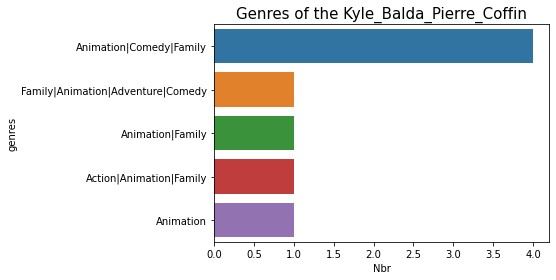

In [61]:
dfm_ge=Kyle_Balda_Pierre_Coffin['genres'].value_counts()
dfm_ge=pd.DataFrame(dfm_ge).reset_index()
dfm_ge.columns = ['genres','Nbr']
sns.barplot(y = 'genres',x = 'Nbr', data=dfm_ge.head())
plt.title('Genres of the Kyle_Balda_Pierre_Coffin',size=15)
dfm_ge.head()

In [62]:
import seaborn as sns
def plot_g(data1,col_name1,col_name2):
  dfm_ge = data1[col_name1].value_counts()
  dfm_ge=pd.DataFrame(dfm_ge).reset_index()
  dfm_ge.columns = [col_name1,col_name2]
  sns.barplot(y =col_name1,x = col_name2, data=dfm_ge.head())
  #plt.title('Genres of the ')
  dfm_ge.head()

The above is not sufficient statistic t categorize Colin_Trevorrow as our high ranking director so i chose to see which director genererates very high
 revenue 

We can establish the popularity of a director's score based on the popularity of a movie is not a 
sufficient statistic as a director such as Colin_Trevorrow comes first in the lkst but has directed only 2
movies with one having a very low score on popularity while the wichowski sisters have a small popularity score 
but have directed a copule of movies with the maatrix havibg a very high score 

In [63]:
#Find out the top 10 directors for whom the revenue is the highest in a new dataframe top_director_rev
director = movies.groupby('director')
top_directors_rev = director['revenue'].mean().sort_values(ascending=False).head(10)
top_directors_rev

director
Kyle Balda|Pierre Coffin                     1.156731e+09
Lee Unkrich                                  1.063172e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon    9.198388e+08
Andrew Stanton|Lee Unkrich                   8.646260e+08
Pete Docter                                  8.537086e+08
David Yates                                  8.308591e+08
Chris Miller|Raman Hui                       7.989582e+08
Roger Allers|Rob Minkoff                     7.882418e+08
Colin Trevorrow                              7.587683e+08
Robert Stromberg                             7.584104e+08
Name: revenue, dtype: float64

In [64]:
Kyle_Balda_Pierre_Coffin_rev=Kyle_Balda_Pierre_Coffin[['release_year', 'revenue']]
Kyle_Balda_Pierre_Coffin_rev.head()

,release_year,revenue
8,2015,1156730962
343,2015,0
1924,2010,543513985
2034,2010,0
2073,2010,0


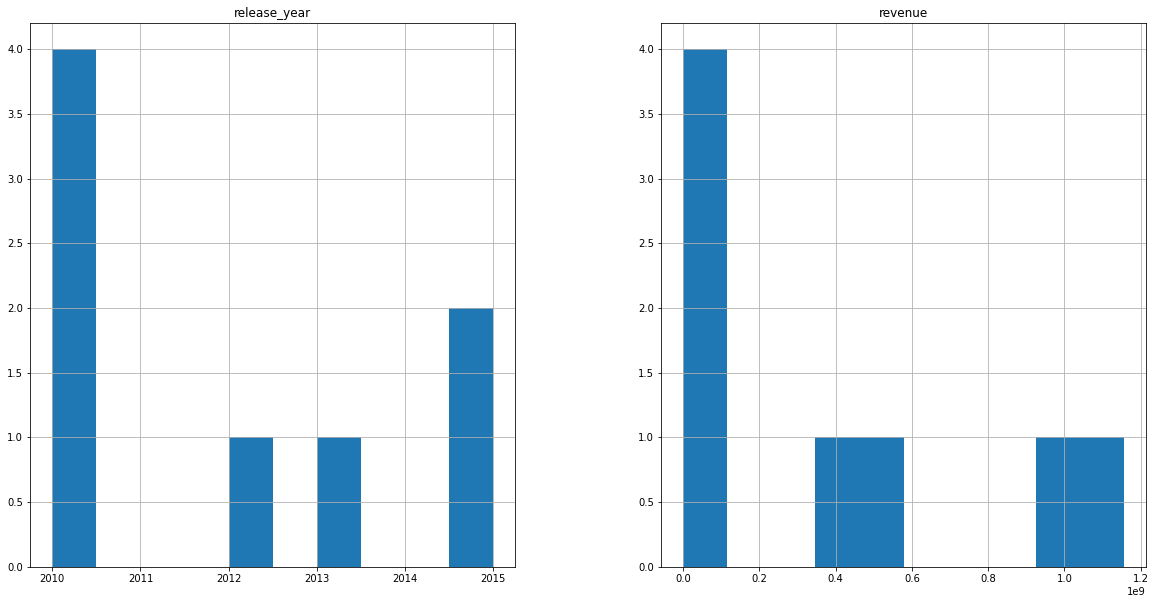

In [65]:
Kyle_Balda_Pierre_Coffin_rev.hist(figsize = (20, 10));

We can see Kyle_Balda_Pierre_Coffin had the highest revenue in 2010 followed by the year 2015 .The statistic above generated a different top director from the previous analysis meaning there are discrepancies and is nit sufficint o categorize the top directo in the dataset.


In [66]:
#Find out the top 10 directors for whom the runtime  is the highest in a new dataframe top_director_run
director = movies.groupby('director')
top_directors_run = director['revenue'].mean().sort_values(ascending=False).head(10)
top_directors_run

director
Kyle Balda|Pierre Coffin                     1.156731e+09
Lee Unkrich                                  1.063172e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon    9.198388e+08
Andrew Stanton|Lee Unkrich                   8.646260e+08
Pete Docter                                  8.537086e+08
David Yates                                  8.308591e+08
Chris Miller|Raman Hui                       7.989582e+08
Roger Allers|Rob Minkoff                     7.882418e+08
Colin Trevorrow                              7.587683e+08
Robert Stromberg                             7.584104e+08
Name: revenue, dtype: float64

The above shows the same order of directors who ranked among the top ten in regards to thr runtime of theor respective movies with Kyle_Balda_Pierre_Coffin
still at the top.
Kyle Balda|Pierre Coffin seem to be the highest grossing director as he has the highes generated revenu while olin Trevorrow  comes in in 9th position as opposed to the previous luist where he was first.
From the above we can say popularity is not a suficient satistic to categorize the high ranking directors

### Research Question 2  (Which year had the most released movies and statistic involved)

In [67]:
# Discover the statistics of revenue
movies.release_year.describe()

count    10800.000000
mean      2001.289537
std         12.819545
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

In [68]:
movies.release_year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, Length: 10800, dtype: int64

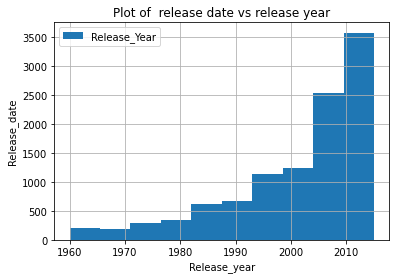

In [69]:
plt.hist(movies.release_year,label ='Release_Year' );
plt.legend()
plt.xlabel('Release_year')
plt.ylabel('Release_date')
plt.title('Plot of  release date vs release year')
plt.grid(True)


Movies released between 2000 and 2010 seem to havve a very high rate of popualarity

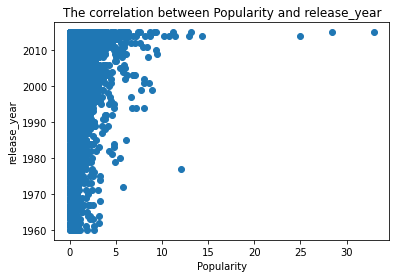

In [70]:
# Draw the scatterplot of the popularity and release_year
plt.scatter(x=movies.popularity, y=movies.release_year)
plt.title('The correlation between Popularity and release_year')
plt.xlabel('Popularity')
plt.ylabel('release_year')

plt.show()

In [71]:
# Calculate the correlation between 'popularity' and 'release_year'
movies[['popularity', 'release_year']].corr()

,popularity,release_year
popularity,1.000000,0.091352
release_year,0.091352,1.000000


the correlation between popularity and release year is 0.91 
which suggests a very high correlation between the two

In [72]:
#Finding the number of movies released between 2000 and 2010 which are the years with movies with most popularity
movies.query('release_year >= 2000')['release_year'].value_counts()

2014    694
2013    652
2015    624
2012    581
2011    539
2009    528
2008    488
2010    479
2007    435
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
Name: release_year, dtype: int64

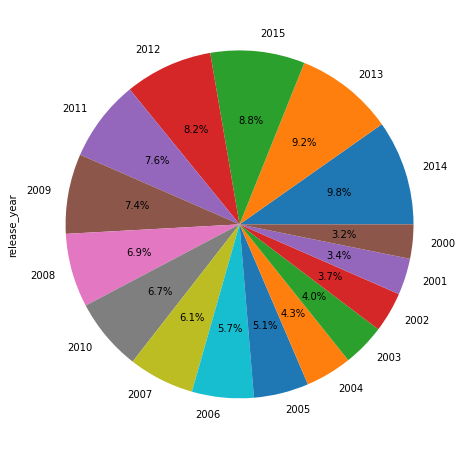

In [73]:
#The percentage distribution of numbe rof movies released between 2000 and 2010
movies.query('release_year >= 2000')['release_year'].value_counts().plot(kind = 'pie', figsize = (8,8) , autopct='%1.1f%%')

From the piechart,2014,2013,2015 and 2012 account for most of the released movies between the tears 2000 and 2010

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

Based on all of the discovery above, some conclusions are drawn:

The number of movies released has increased over time with the period beteen 2000 and 2010 having the most released movies. 
The Popularity showcases a  strong positive correlation with the release yearand revenue while there seems to be a weakk correlation between runtime and budget   .
The director with the most popularity movies seems to only have wored in 2 genres while some have diverse genres with a lower popularity rate

The limitation of this analysis is some columns and addtional data were dropped which may make the end result biased and not a full representation of the sample data .

Citations

https://github.com/yinghaoz1/tmdb-movie-dataset-analysis/blob/master/tmdb-movie-dataset-analysis.ipynb
https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e (For the heatmap)
    

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255